# Sprint 2: Data Preparation

### Loading data from CSV file

In [6]:
# import og nesecery libraries

import pandas as pd

In [7]:
youssef_path = '/Users/youssefbadran/Documents/datamatiker/4. semester/BI/sp500_data.csv'


df_sp500 = pd.read_csv('/Users/youssefbadran/Documents/datamatiker/4. semester/BI/sp500_data.csv')
df_interest_inflation = pd.read_csv('https://raw.githubusercontent.com/badranyoussef/bi-exam-project-stock/main/datasets/fed_interest_rate_inflation.csv')

HTTPError: HTTP Error 404: Not Found

### Cleaning SP500 DF

In [6]:
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4239723 entries, 0 to 4239722
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date       object 
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Adj Close  float64
 6   Volume     float64
 7   Ticker     object 
dtypes: float64(6), object(2)
memory usage: 258.8+ MB


In [7]:
df_sp500['Date'] = pd.to_datetime(df_sp500['Date'])


df_sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,1962-01-02,0.0,3.553512,3.448997,3.475125,0.570977,254509.0,MMM
1,1962-01-03,0.0,3.501254,3.416336,3.501254,0.575270,505190.0,MMM
2,1962-01-04,0.0,3.560044,3.501254,3.501254,0.575270,254509.0,MMM
3,1962-01-05,0.0,3.488190,3.396739,3.409804,0.560244,376979.0,MMM
4,1962-01-08,0.0,3.416336,3.370610,3.390207,0.557025,399942.0,MMM


In [8]:
df_sp500 = df_sp500.drop(columns="Ticker")

In [9]:
df_sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.0,3.553512,3.448997,3.475125,0.570977,254509.0
1,1962-01-03,0.0,3.501254,3.416336,3.501254,0.575270,505190.0
2,1962-01-04,0.0,3.560044,3.501254,3.501254,0.575270,254509.0
3,1962-01-05,0.0,3.488190,3.396739,3.409804,0.560244,376979.0
4,1962-01-08,0.0,3.416336,3.370610,3.390207,0.557025,399942.0


In [10]:
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4239723 entries, 0 to 4239722
Data columns (total 7 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date       datetime64[ns]
 1   Open       float64       
 2   High       float64       
 3   Low        float64       
 4   Close      float64       
 5   Adj Close  float64       
 6   Volume     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 226.4 MB


In [11]:
# Checking for null values
print(df_sp500.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


### Cleaning interest and inflation DF

In [12]:
df_interest_inflation.sample(15)

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
40,1957,11,1,NaN,NaN,NaN,3.28,NaN,5.1,NaN
705,2003,3,1,1.2500,NaN,NaN,1.25,NaN,5.9,1.7
590,1995,8,1,5.7500,NaN,NaN,5.74,NaN,5.7,2.9
842,2012,5,1,NaN,0.25,0.0,0.16,NaN,8.2,2.3
709,2003,6,25,1.0000,NaN,NaN,NaN,NaN,NaN,NaN
142,1966,5,1,NaN,NaN,NaN,4.90,NaN,3.9,2.1
741,2005,6,1,3.0000,NaN,NaN,3.04,NaN,5.0,2.0
6,1955,1,1,NaN,NaN,NaN,1.39,11.9,4.9,NaN
434,1987,3,1,6.0000,NaN,NaN,6.13,NaN,6.6,4.0
693,2002,4,1,1.7500,NaN,NaN,1.75,2.2,5.9,2.5


In [13]:
df_interest_inflation_dropped = df_interest_inflation[["Year", "Month", "Day", "Effective Federal Funds Rate", "Inflation Rate"]]

df_interest_inflation_dropped.head()


,Year,Month,Day,Effective Federal Funds Rate,Inflation Rate
0,1954,7,1,0.80,NaN
1,1954,8,1,1.22,NaN
2,1954,9,1,1.06,NaN
3,1954,10,1,0.85,NaN
4,1954,11,1,0.83,NaN


In [14]:
# combining the columns year month and day to a single column called date as we have a column 
#df_interest_inflation_dropped['date'] = pd.to_datetime(df_interest_inflation_dropped[['Year', 'Month', 'Day']])
df_interest_inflation_dropped.loc[:, 'Date'] = pd.to_datetime(df_interest_inflation_dropped[['Year', 'Month', 'Day']])

df_interest_inflation_dropped = df_interest_inflation_dropped.drop(['Year', 'Month', 'Day'], axis=1)

df_interest_inflation_dropped.sample()

/var/folders/nb/fxty61xd7jsbp25hcb0fqkr00000gn/T/ipykernel_7605/593098422.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interest_inflation_dropped.loc[:, 'Date'] = pd.to_datetime(df_interest_inflation_dropped[['Year', 'Month', 'Day']])


,Effective Federal Funds Rate,Inflation Rate,Date
122,3.45,1.3,1964-09-01


In [15]:
df_interest_inflation_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Effective Federal Funds Rate  752 non-null    float64       
 1   Inflation Rate                710 non-null    float64       
 2   Date                          904 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2)
memory usage: 21.3 KB


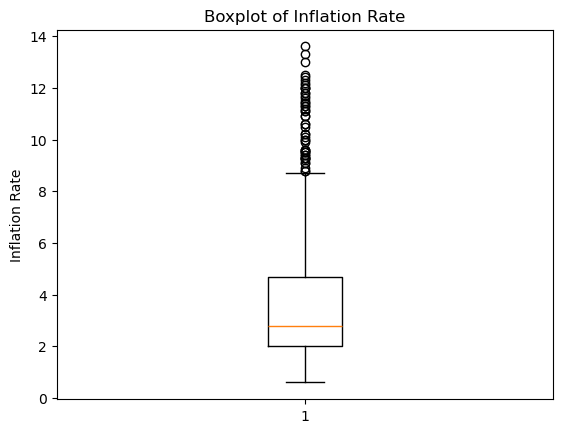

In [16]:
import matplotlib.pyplot as plt

plt.boxplot(df_interest_inflation_dropped['Inflation Rate'].dropna())
plt.title('Boxplot of Inflation Rate')
plt.ylabel('Inflation Rate')
plt.show()

In [17]:
Q1 = df_interest_inflation_dropped['Inflation Rate'].quantile(0.25)
Q3 = df_interest_inflation_dropped['Inflation Rate'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_interest_inflation_dropped[(df_interest_inflation_dropped['Inflation Rate'] < lower_bound) | 
                                         (df_interest_inflation_dropped['Inflation Rate'] > upper_bound)]

print(f"Outliers:\n{outliers}")


Outliers:
     Effective Federal Funds Rate  Inflation Rate       Date
240                         12.92             8.8 1974-07-01
241                         12.01             9.6 1974-08-01
242                         11.34            10.2 1974-09-01
243                         10.06            10.6 1974-10-01
244                          9.45            11.2 1974-11-01
245                          8.53            11.1 1974-12-01
246                          7.13            11.5 1975-01-01
247                          6.24            11.7 1975-02-01
248                          5.54            11.4 1975-03-01
249                          5.49            11.3 1975-04-01
250                          5.22            10.5 1975-05-01
251                          5.55             9.6 1975-06-01
252                          6.10             9.1 1975-07-01
295                         10.06             9.2 1979-02-01
296                         10.09             9.3 1979-03-01
297           

In [18]:
outliers.count()

Effective Federal Funds Rate    52
Inflation Rate                  52
Date                            52
dtype: int64

In [19]:
df_interest_inflation_dropped.tail(30)

,Effective Federal Funds Rate,Inflation Rate,Date
874,0.11,1.6,2015-01-01
875,0.11,1.7,2015-02-01
876,0.11,1.8,2015-03-01
877,0.12,1.8,2015-04-01
878,0.12,1.7,2015-05-01
879,0.13,1.8,2015-06-01
880,0.13,1.8,2015-07-01
881,0.14,1.8,2015-08-01
882,0.14,1.9,2015-09-01
883,0.12,1.9,2015-10-01


In [20]:
# Konverter til datetime og sæt som indeks (hvis ikke allerede gjort)
df_sp500['Date'] = pd.to_datetime(df_sp500['Date'])
df_sp500.set_index('Date', inplace=True)

# Resample til månedsstart
df_sp500_monthly = df_sp500.resample('MS').first()

# Reset indeks for at få "Date" som kolonne
df_sp500_monthly.reset_index(inplace=True)

# Nu burde "Date" være en almindelig kolonne igen
print(df_sp500_monthly.head())

        Date  Open      High       Low     Close  Adj Close    Volume
0 1962-01-01   0.0  3.553512  3.448997  3.475125   0.570977  254509.0
1 1962-02-01   0.0  3.573108  3.435932  3.553512   0.583857  319571.0
2 1962-03-01   0.0  3.520851  3.448997  3.475125   0.572706  139693.0
3 1962-04-01   0.0  3.651495  3.625366  3.644962   0.600695  116730.0
4 1962-05-01   0.0  3.422868  3.292224  3.403271   0.560864  359757.0


In [21]:
# funktion til at til at filtrere dataset efter 1962 og før 2017
def filter_df(df):
  filtered_df = df[(df['Date'] >= pd.Timestamp('1962-01-01')) & (df['Date'] < pd.Timestamp('2017-01-01'))]
  return filtered_df

In [22]:
sp500_filtered = filter_df(df_sp500_monthly)
infl_inter_filtered = filter_df(df_interest_inflation_dropped)

In [23]:
df_merged = sp500_filtered.merge(infl_inter_filtered, how='outer')

In [30]:
df_merged = df_merged.drop(df_merged.index[-1])

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          808 non-null    datetime64[ns]
 1   Open                          659 non-null    float64       
 2   High                          659 non-null    float64       
 3   Low                           659 non-null    float64       
 4   Close                         659 non-null    float64       
 5   Adj Close                     659 non-null    float64       
 6   Volume                        659 non-null    float64       
 7   Effective Federal Funds Rate  659 non-null    float64       
 8   Inflation Rate                659 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 56.9 KB


### Filling Out Missing Values with "Forward Fill / Backward Fill"
When working with stock prices, interest rates, and inflation data, it's important to handle missing values in a way that maintains the integrity of the time series. Two common methods for filling in missing values are "Forward Fill" and "Backward Fill":

Forward Fill (ffill): This method replaces missing values with the most recent available value. For example, if there is a missing value for a given day, it will be filled with the value from the previous day. This approach assumes that the most recent data point is a reasonable estimate for the missing value, which is often valid for financial data where values tend to change slowly over time.

Backward Fill (bfill): This method fills missing values with the next available value. If a value is missing for a specific day, it will be filled with the value from the subsequent day. This approach assumes that the next available data point can be used to estimate the missing value.

In [31]:
df_merged_filled = df_merged.ffill()

In [32]:
df_merged_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          808 non-null    datetime64[ns]
 1   Open                          808 non-null    float64       
 2   High                          808 non-null    float64       
 3   Low                           808 non-null    float64       
 4   Close                         808 non-null    float64       
 5   Adj Close                     808 non-null    float64       
 6   Volume                        808 non-null    float64       
 7   Effective Federal Funds Rate  808 non-null    float64       
 8   Inflation Rate                808 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 56.9 KB


### Data seams to be pretty clean and ready to use. There are no null or missing values. I only dropped on column called Ticker which has no influence in our project

### Vizualization by creating plots

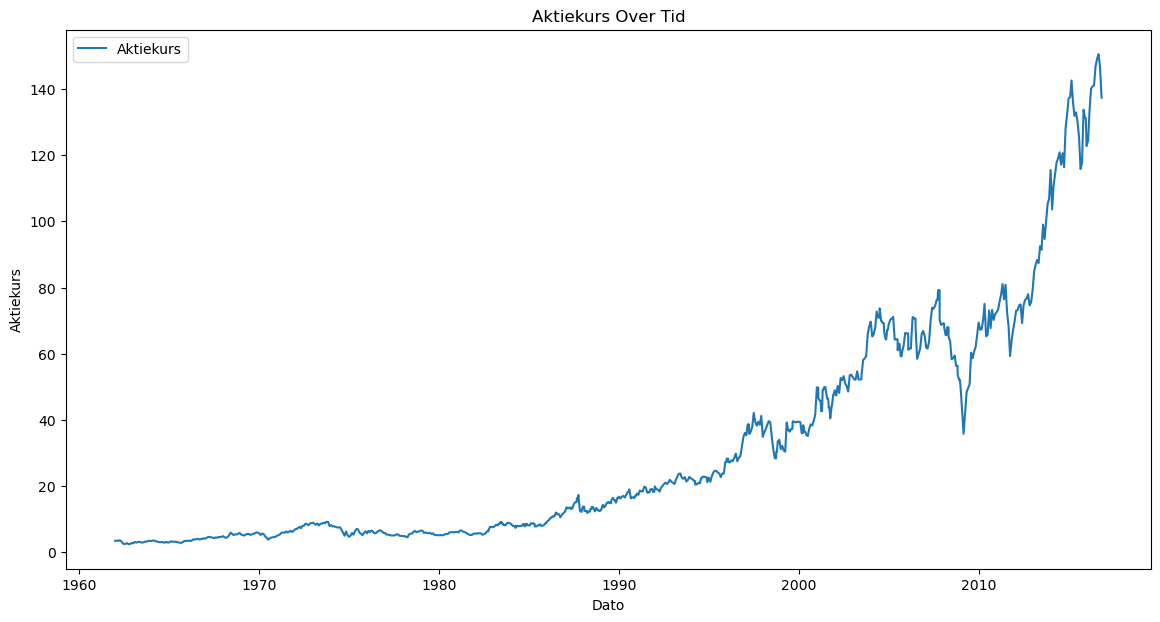

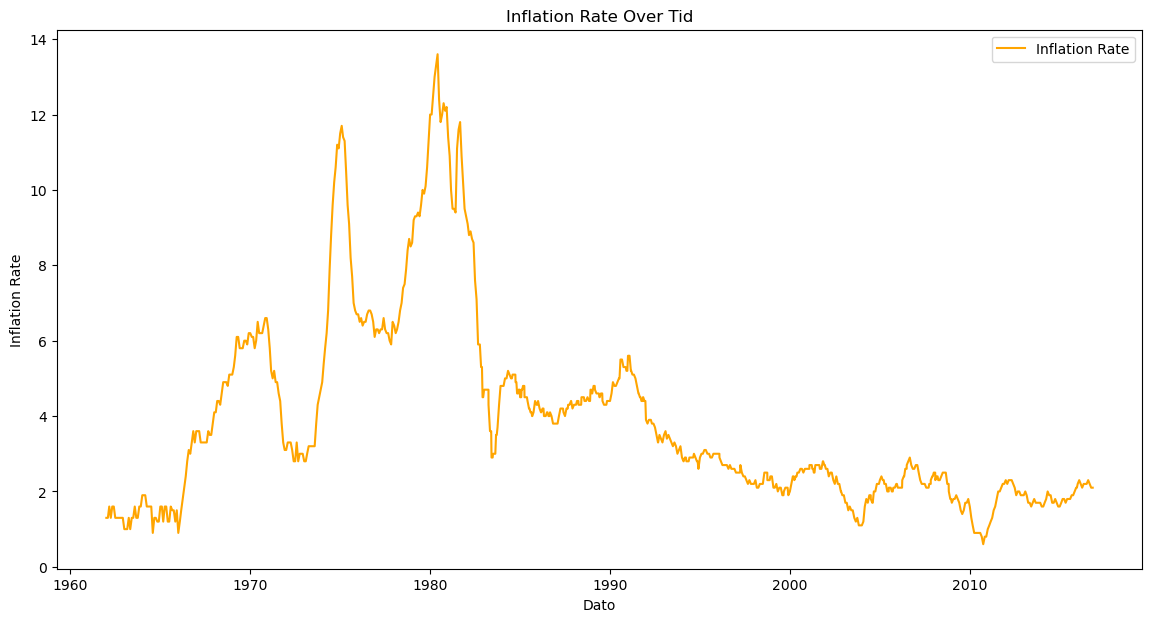

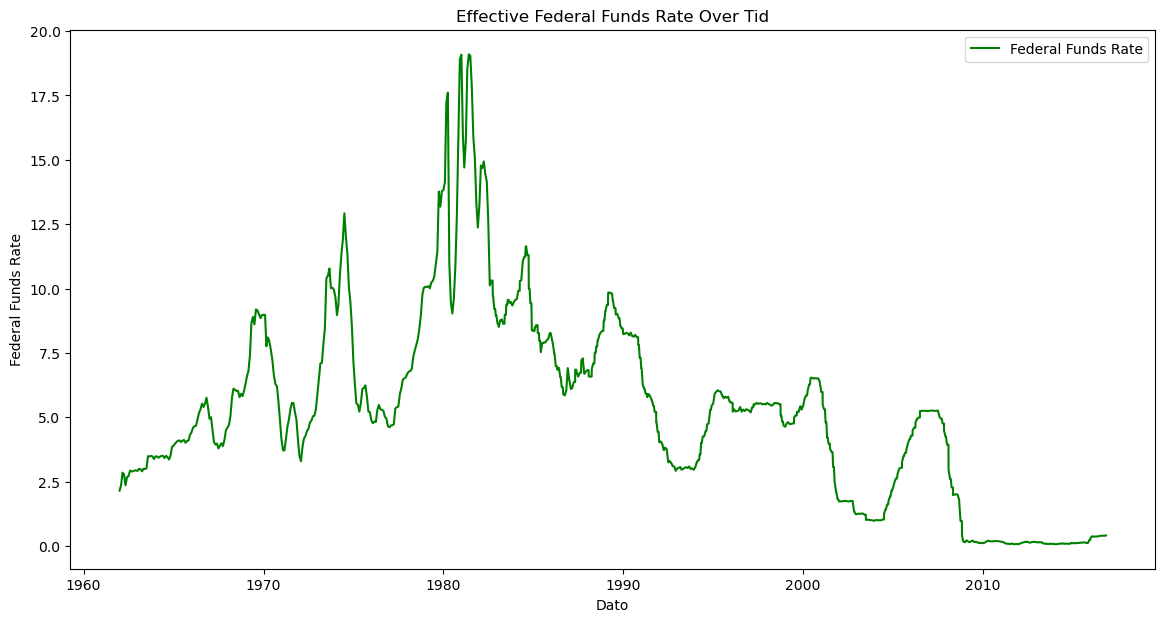

In [34]:
# Antag df_combined har kolonnerne 'Date', 'Close', 'Inflation Rate', 'Effective Federal Funds Rate'

# Konverter 'Date' kolonnen til datetime format
df_merged_filled['Date'] = pd.to_datetime(df_merged_filled['Date'])

# Plot aktiekurser
plt.figure(figsize=(14, 7))
plt.plot(df_merged_filled['Date'], df_merged_filled['Close'], label='Aktiekurs')
plt.xlabel('Dato')
plt.ylabel('Aktiekurs')
plt.title('Aktiekurs Over Tid')
plt.legend()
plt.show()

# Plot inflation rate
plt.figure(figsize=(14, 7))
plt.plot(df_merged_filled['Date'], df_merged_filled['Inflation Rate'], label='Inflation Rate', color='orange')
plt.xlabel('Dato')
plt.ylabel('Inflation Rate')
plt.title('Inflation Rate Over Tid')
plt.legend()
plt.show()

# Plot effective federal funds rate
plt.figure(figsize=(14, 7))
plt.plot(df_merged_filled['Date'], df_merged_filled['Effective Federal Funds Rate'], label='Federal Funds Rate', color='green')
plt.xlabel('Dato')
plt.ylabel('Federal Funds Rate')
plt.title('Effective Federal Funds Rate Over Tid')
plt.legend()
plt.show()


In [1]:
import seaborn as sns

# Beregn korrelation
correlation_matrix = df_merged_filled[['Close', 'Inflation Rate', 'Effective Federal Funds Rate']].corr()

# Plot korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlationsmatrix')
plt.show()

NameError: name 'df_merged_filled' is not defined